#R Workflow for DACSS 601

Before we start, welcome to Google Colab. You are reading an interactive notebook similar to interactive (Jupyter) notebooks you might have used in a CS course. Technically, this file is a python notebook - thus the suffix of .ipynb. However, this particular notebook is setup to run the R kernal, thus any executible code snippets are run in R (not python.) 

There are two ways to complete your homework for this course: on your personal computer, or through Google Colab. This document takes you through the workflow for each approach.


## Personal Computer
To work in R on your personal computer, you will need to setup your home computer prior to your first weekly workflow. This installation and setup should only be done once, although some libraries may be added in the future and some of you may want to update existing R installations and package libraries.

#### Setup your computer
   -  Install R and RStudio
   -   Install any additional libraries required
   -   install a [LaTex distribution such as TinyTex](https://bookdown.org/yihui/rmarkdown-cookbook/install-latex.html) to create *.pdf* files with RMarkdown.

#### Weekly homeworks/Final Project
  - download data required into working directory (e.g., using [BackupAndSync for GoogleDrive](https://https://support.google.com/drive/answer/2374987)
  - start and save a syntax file with a ".R" or ".RMD" ending, ideally to the same working directory where you have stored your data
  - work in RStudio to edit and complete the syntax file
  - run (.R) or knit (.RMD) files prior to submission

#### Submit work by uploading to Classroom or GitHub.


*Note: If you conduct your analysis on your personal computer, the instructor cannot provide feedback or troubleshooting support for your code unless you use Backup and Sync on a folder shared with the instructor.*

---


## Interactive Colab Notebook
Alternatively, you can any project or assignment interactively in Google Colab so long as you put the data you are using in a location where both you and the instructor can access it. To provide access to the data, you will:

-   upload it to the class shared drive folder
  -   OR
-   modify the sharing settings on a file in your Google Drive

Afterwards, you can either:
-   read a single data file in using `gdown`
-   read a file or folder in using `colabr` custom package


### Change Sharing Settings on File or Folder

We may update a file's permissions to be public by:

1. Right clicking a file and clicking "Share":

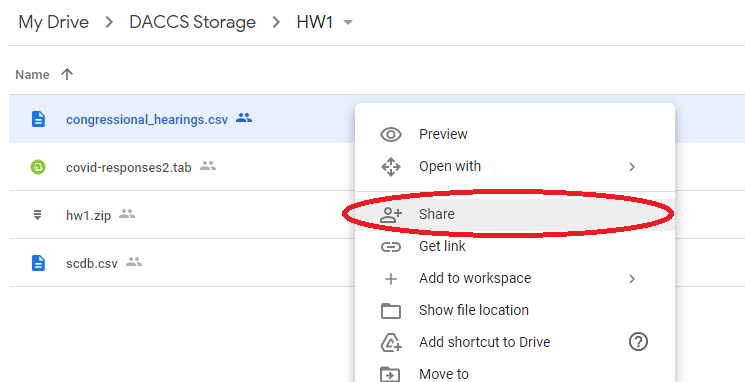

2. Click "Change":

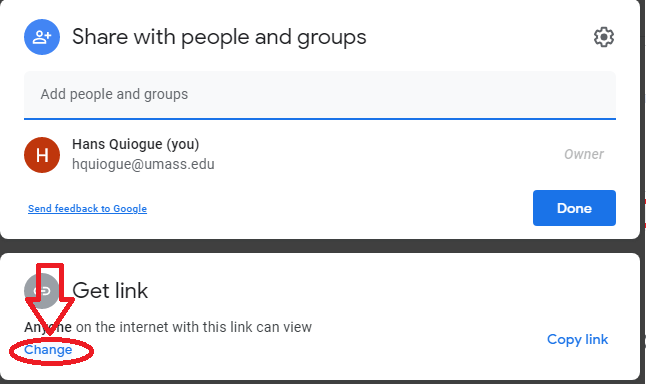

3. Update the link so that "Anyone with the link" can view it:

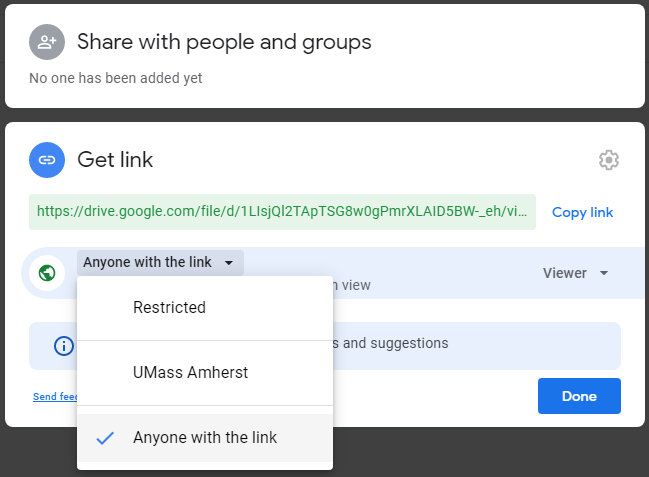

If you have placed the files in a directory, you can simply update the directory permissions and that will update the permissions for all the files stored in said directory. **If there are multiple files in the directory, this will avoid the need to update the permissions for each file.** 

Updating the permissions for a directory is also the same process as the file version. However, instead of right clicking a *file*, you will need to right click the *directory that stores the files*.




## Read a single file using `gdown`


For an R notebook, only one line is needed to download a file from Google Drive: `system("gdown --id FILE_ID_GOES_HERE")`. 

To use `gdown`, you only need to include the library name itself, the flag `--id` to include the file ID, and the ID of file itself. Finding the file ID will be explained in the next section. We also use [`system()`](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/system) to call the `gdown` command since we are running an R. 

The drawback is that `gdown` only applies to *single files*. If you wanted to include multiple files, you would need to use multiple `system("gdown ...")` calls:

- `system("gdown --id FILE_ID_1")`
- `system("gdown --id FILE_ID_2")`
- `system("gdown --id FILE_ID_3")`
- and so on until necessary..

If you would like to download and read multiple files, it is still possible with `gdown` but would require the additional step of copy and pasting multiple Google Drive file IDs and using multiple system calls. 

One method of avoiding this issue is uploading a single zip file that contains the datasets. This way, you will only need to call the command once.

If you would like to learn other information relating to `gdown`, here is the [GitHub](https://github.com/wkentaro/gdown) page for it.

#### Getting the File ID

With `gdown`, we only need to find the file ID and call the `gdown` command with the ID as an argument. 

Assuming you have access to the file, to find the ID, all you need to do is right click a file and click "Get link":

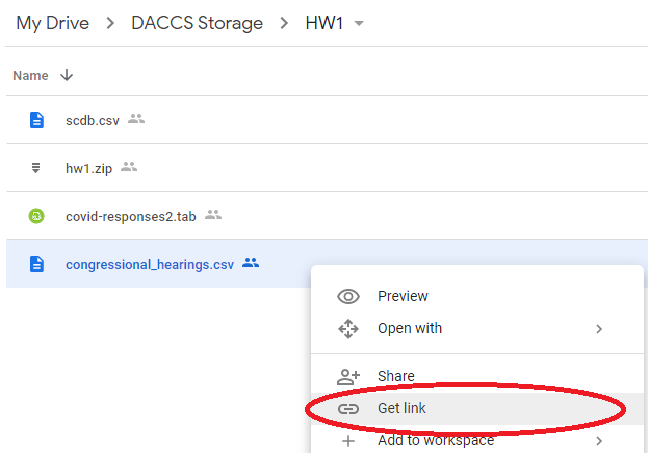

Once clicked, a menu will pop up with the file link. Inside the link, the ID can be seen. It is stored in between the `/d/` and `/view?usp=sharing` paths:

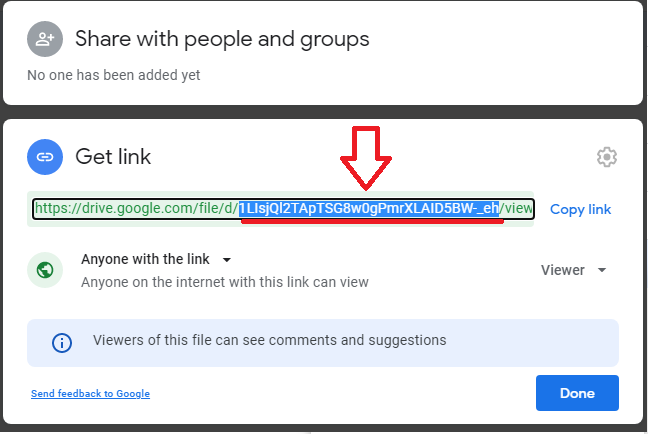

Simply copy and paste the ID.

#### Downloading the File

The next step is to run the `gdown` command with the ID. In my example, the files can be retrieved from the class Drive folder: https://drive.google.com/drive/folders/12h6ow04QaMEMEtJZm4Ly3MFTcRYYDgzl

We can retrieve the **congressional hearings CSV file** that has an ID of `1BFbWrtlg4pzadwd9VxGfatBZJUtkaGa-`. I can download that file like so:

In [ ]:
# Easiest method with Google Drive 

# Downloads congressional_hearings.csv by id
# Assuming file is public
system("gdown --id 1BFbWrtlg4pzadwd9VxGfatBZJUtkaGa-")

Note: `gdown` only works for **file IDs**. Google Drive folder IDs will not work! You will need to use multiple `system("gdown ...")` calls to download multiple files.

We can check that the file is downloaded by clicking the folder icon in the left side of Google Colab:

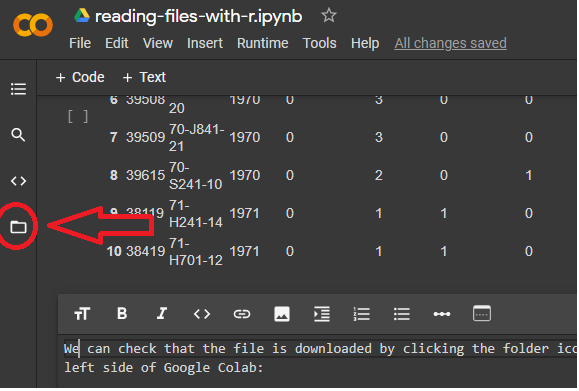

And seeing the file we have just downloaded:

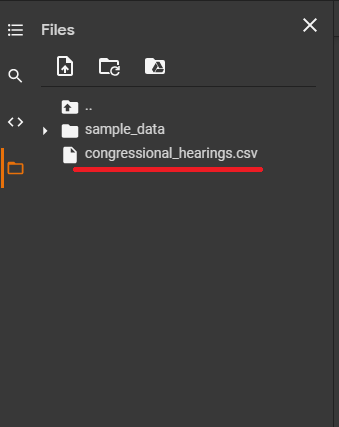

Note that it may take a couple seconds for the file to show up (I would recommend closing the menu and reopening it if it hasn't shown up yet). If the file is not there for you, I would double check the file permissions and then the file ID to see if they are correct.

#### Reading in Files

We can read in the file now like so:

In [ ]:
data <- read.csv("congressional_hearings.csv")

head(data, 5)

That's all there is to it with `gdown`!

## colabr

### Load needed libraries 

Note that the library `colabr` is a custom package created for the DACSS program by Hans Quiogue '21.

In [ ]:
# Install these packages if you haven't already
if (!require('colabr')) devtools::install_github('hansquiogue/colabr', force=TRUE)

In [ ]:
# Load libraries
library(colabr)

### Access Shared Data Folder

First, you will need to identify the link for the drive file or folder you will be using. The link for the shared DACSS 601 Data File is 
https://drive.google.com/drive/folders/12h6ow04QaMEMEtJZm4Ly3MFTcRYYDgzl?usp=sharing

All you need to do is run the command `download_drive()`. An entire folder will work (as long as it does not contain sub-folders).

In [ ]:
# Downloads entire contents in class folder
download_drive("https://drive.google.com/drive/folders/12h6ow04QaMEMEtJZm4Ly3MFTcRYYDgzl?usp=sharing")

<img src="https://i.imgur.com/vGhxj4A.png" alt="alert" width="50" height="50">
<br><font size="+1" face="Arial" color="Red" id="preview">Make sure the that the folder does not contain sub-folders inside it! Having sub-folders will give errors running the code below. There should only be files inside!</font>

A single file that is publicly available will work as well.

In [ ]:
# Downloads single file in class folder
download_drive("https://drive.google.com/file/d/1BFbWrtlg4pzadwd9VxGfatBZJUtkaGa-/view?usp=sharing")

## Inspect Data

This is where all the homework part goes :-)
